### 统计学：检验心理学现象

在下方单元格中回答问题并执行相关代码，你可以 [参考项目指导](https://github.com/udacity/new-dand-advanced-china/blob/master/%E6%A3%80%E9%AA%8C%E5%BF%83%E7%90%86%E5%AD%A6%E7%8E%B0%E8%B1%A1/%E7%BB%9F%E8%AE%A1%E5%AD%A6%EF%BC%9A%E6%A3%80%E9%AA%8C%E5%BF%83%E7%90%86%E5%AD%A6%E7%8E%B0%E8%B1%A1.md) 并在正式提交前查看 [项目要求](https://review.udacity.com/#!/rubrics/305/view)。提交时请将 Jupyter notebook 导出成 HTML 或者 PDF 进行提交（File -> Download As）。

背景信息

在一个Stroop （斯特鲁普）任务中，参与者得到了一列文字，每个文字都用一种油墨颜色展示。参与者的任务是将文字的打印颜色大声说出来。这项任务有两个条件：一致文字条件，和不一致文字条件。在一致文字条件中，显示的文字是与它们的打印颜色匹配的颜色词，如“红色”、“蓝色”。在不一致文字条件中，显示的文字是与它们的打印颜色不匹配的颜色词，如“紫色”、“橙色”。在每个情况中，我们将计量说出同等大小的列表中的墨色名称的时间。每位参与者必须全部完成并记录每种条件下使用的时间。

调查问题

作为一般说明，请确保记录你在创建项目时使用或参考的任何资源。作为项目提交的一部分，你将需要报告信息来源。

(1) 我们的自变量是什么？因变量是什么？

**自变量是是文字与文字的墨色是否匹配，因变量是说出墨色名称的时间**

(2) 此任务的适当假设集是什么？你需要以文字和数学符号方式对假设集中的零假设和对立假设加以说明，并对数学符号进行定义。你想执行什么类型的统计检验？为你的选择提供正当理由（比如，为何该实验满足你所选统计检验的前置条件）。

**零假设是Congruent组与Incongruent组二者的计时无显著差异，备择假设是二者有显著差异。**
- H0：TC=TI
- H1：TC!=TI

**其中TC为Congruent组的计时，TI为Incongruent组的计时。**

**在此选择相依样本双尾t检验，因为该实验有两种受试条件，这两个受试条件的先后顺序对实验结果影响不大，即受试者先进行文字与墨色一致的试验，再进行文字与墨色不一致的试验时，后者受前者的影响不大，所以两个受试条件可以在一个受试者体内先后进行。**

**由于实验是对同一受试者进行两次不同测试，故测试对象是相依样本，具体到此例，属于受试者内设计 的重复衡量设计，加之相依样本t检验控制了个体差异，可以用较少的受试者来进行检验，故实验数据可以满足 要求。 另外由于我们无法得知总体参数，如总体均值，总体标准偏差，而t检验正好不需要知道总体参数，但 我们推测总体大致成正态分布，受试者互相之间是独立的，故可以放心使用t检验。**

现在轮到你自行尝试 Stroop 任务了。前往此链接，其中包含一个基于 Java 的小程序，专门用于执行 Stroop 任务。记录你收到的任务时间（你无需将时间提交到网站）。现在下载此数据集，其中包含一些任务参与者的结果。数据集的每行包含一名参与者的表现，第一个数字代表他们的一致任务结果，第二个数字代表不一致任务结果。

(3) 报告关于此数据集的一些描述性统计。包含至少一个集中趋势测量和至少一个变异测量。

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
df=pd.read_csv('stroopdata.csv')
df.head()

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


In [6]:
# 数据的形状
df.shape

(24, 2)

In [26]:
#对照组与实验组的样本平均值
TC=df['Congruent'].mean()
TI=df['Incongruent'].mean()
diff_mean=TC-TI
diff_mean

-7.964791666666665

In [25]:
#对照组与实验组差异的样本标准差
df['diff']=df['Congruent']-df['Incongruent']
diff_std=df['diff'].std()

(4) 提供显示样本数据分布的一个或两个可视化。用一两句话说明你从图中观察到的结果。

In [56]:
Congruent_means=[]
for _ in range(10000):
    sample_Congruent=df.sample(24,replace=True)
    Congruent_mean=sample_Congruent['Congruent'].mean()
    Congruent_means.append(Congruent_mean)

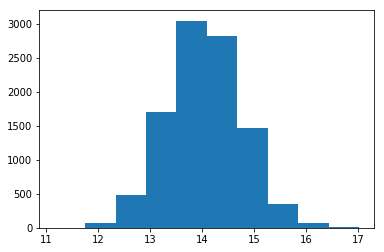

In [57]:
plt.hist(Congruent_means);

In [58]:
Incongruent_means=[]
for _ in range(10000):
    sample_Incongruent=df.sample(24,replace=True)
    Incongruent_mean=sample_Incongruent['Incongruent'].mean()
    Incongruent_means.append(Incongruent_mean)

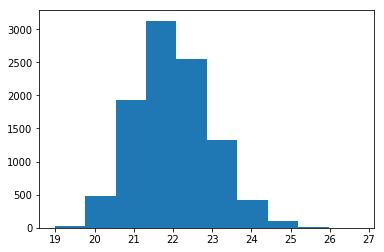

In [62]:
plt.hist(Incongruent_means);

**将Incongruent组和congruent进行拔靴抽样10000次，每次样本量为24，可以看到二者抽样分差异较大，二者的抽样分布末端值不存在重叠。**

(5) 现在，执行统计测试并报告你的结果。你的置信水平和关键统计值是多少？你是否成功拒绝零假设？对试验任务得出一个结论。结果是否与你的期望一致？

In [69]:
#计算t统计量，自由度为24-1=23,a=0.05的双尾t检验，对照p值表，t的临界值为正负2.069
degrees_of_freedom=23
t=(diff_mean-0)/(diff_std/(pow(24, 1/2)))
t

-8.020706944109955

**t统计量落在小于t临界值-2.069的区间内，p值小于0.05，所以成功拒绝零假设，实验组和对照组的差异存在统计显著性。**

In [72]:
#实验组与对照组差异的置信区间，已知a=0.05,则置信度为95%
Confidence_interval_upper_limit=diff_mean-t*(diff_std/pow(24, 1/2))
Confidence_interval_lower_limit=diff_mean+t*(diff_std/pow(24, 1/2))
Confidence_interval_lower_limit,Confidence_interval_upper_limit

(-15.92958333333333, 0.0)

**Congruent组和Incongruent组差异的95%置信区间为(-16,0)**

**根据试验结果，我们成功拒绝零假设，即Congruent组和Incongruent组存在差异性，同时，Congruent组和Incongruent组差异的95%置信区间为(-16,0)**

In [73]:
# 在这里执行统计检验
from scipy import stats
stats.ttest_ind(df['Congruent'],df['Incongruent'])

Ttest_indResult(statistic=-6.5322505539032285, pvalue=4.5949489622951854e-08)